# Data exploration

In [7]:
# at first i will open the files and look how they are structured

In [8]:
import pandas as pd
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import altair as alt
%matplotlib inline  

features = pd.read_pickle(r'phase_2_TRAIN_ab71fa4d86c94323_05dcbf4_MLPC2021_features_pandas.pkl')

features

,id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,...,librosa_spectral_flatness_stdev,midlevel_features_melody,midlevel_features_articulation,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness,score_mode,score_key_strength
0,GG-01-000,0.206445,0.131383,13.998791,58.329521,3.1,0.539736,0.193987,3367.790527,3684.124268,...,0.248388,0.065397,-0.029380,-0.303987,-0.053306,-0.325228,0.347745,-0.119278,0.0,0.795727
1,GG-01-001,0.145753,0.057971,3.533264,75.166183,4.2,0.476832,0.123564,1395.528809,401.987610,...,0.000484,0.353040,-0.073957,-0.381182,0.120750,-0.479266,0.451572,-0.064252,0.0,0.844387
2,GG-01-002,0.149111,0.059011,3.337368,82.753929,4.3,0.457741,0.132359,1318.759644,289.306152,...,0.000314,0.201885,0.016944,-0.337422,0.103853,-0.388214,0.430684,-0.226197,0.0,0.758119
3,GG-01-003,0.163914,0.057474,3.078172,79.024742,4.1,0.504427,0.121134,1258.258423,262.561310,...,0.000257,0.181998,-0.019165,-0.314282,0.118872,-0.335902,0.314371,-0.006619,1.0,0.747180
4,GG-01-004,0.157382,0.054116,2.682208,59.633064,3.9,0.503377,0.121658,1244.375122,260.756195,...,0.000241,0.256362,-0.151648,-0.302913,-0.002940,-0.395495,0.368037,-0.162711,0.0,0.710480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,RT-47-029,0.106072,0.048556,4.600393,71.847145,1.7,0.541098,0.146353,3761.501709,1075.834717,...,0.003238,0.357967,-0.189399,-0.294453,-0.048271,-0.518002,0.364257,-0.344354,0.0,0.741726
3751,RT-47-030,0.097130,0.045978,4.032829,81.727577,2.4,0.506956,0.129266,3283.780029,956.233765,...,0.002562,0.223821,-0.081319,-0.211686,-0.043546,-0.427122,0.318351,-0.382207,0.0,0.729813
3752,RT-47-031,0.142735,0.059378,4.094213,27.877666,0.9,0.553664,0.155784,5419.066406,1376.261963,...,0.009679,0.190541,-0.334320,-0.268202,-0.223166,-0.392003,0.249261,-0.183019,0.0,0.752923
3753,RT-47-032,0.134667,0.057092,5.675084,57.549480,1.4,0.524951,0.150398,4481.284668,1550.097534,...,0.007357,0.292983,-0.208947,-0.286899,-0.110805,-0.460086,0.320651,-0.221194,0.0,0.744074


In [9]:

raw = pd.read_pickle(r'phase_2_TRAIN_8d8d624e3190984c_05dcbf4_MLPC2021_raw_annotations_pandas.pkl')

raw

,student,pianist,piece,arousal,valence
0,student_000,GG,01,30,-1
1,student_000,GG,02,30,1
2,student_000,GG,03,70,-2
3,student_000,GG,04,30,0
4,student_000,GG,05,90,2
...,...,...,...,...,...
5737,student_165,RT,39,80,-4
5738,student_165,RT,41,100,4
5739,student_165,RT,45,50,1
5740,student_165,RT,46,40,2


# Questions we should answer

1.) How consistent are the emotion annotations? Do different annotators agree in their ratings of the same excerpt? <br>
2.) How are the emotion annotations (valence, arousal, or angle) related to the major/minor feature?<br>
3.) Derive discrete quadrant-based class labels from the raw annotations. Any ideas on how to aggregate conflicting annotations? Outliers?<br>
4.) How are the resulting discrete class labels distributed? Are the classes unbalanced, and how much?<br>
5.) How are the features distributed? Are there any pairs or subsets of features that seem highly correlated or redundant?<br>
6.) Which features seem useful for classification? Which ones are correlated with the labels?<br>
7.) Any interesting conclusions you can draw from this for the next project phase?<br>

# 1) How consistent are the emotion annotations? Do different annotators agree in their ratings of the same excerpt?

In [10]:
raw_gg = raw.loc[raw["pianist"] == "GG"]

In [11]:
raw_gg

,student,pianist,piece,arousal,valence
0,student_000,GG,01,30,-1
1,student_000,GG,02,30,1
2,student_000,GG,03,70,-2
3,student_000,GG,04,30,0
4,student_000,GG,05,90,2
...,...,...,...,...,...
1021,student_029,GG,39,40,0
1022,student_029,GG,41,30,0
1023,student_029,GG,45,30,0
1024,student_029,GG,46,30,0


In [12]:
alt.Chart(raw_gg).mark_circle(size=60).encode(
    x=alt.X('valence',
        scale=alt.Scale(domain=(-5, 5))
    ),
    y=alt.X('arousal',
        scale=alt.Scale(domain=(0, 100))
    )
    
    ,column='piece'
).configure_axis(
    grid=False
).properties(
    width=200,
    height=200
)

alt.Chart(...)

# 2) How are the emotion annotations (valence, arousal, or angle) related to the major/minor feature?

# 3) Derive discrete quadrant-based class labels from the raw annotations. Any ideas on how to aggregate conflicting annotations? Outliers?

The simplest way would be to set the quadrants borders to the mean/median of the valence/arousal feature, and naming the quadrants like in the task slides. (Angry, Happy, Sad, Relaxed) \
The aggregation of conflicting annotation could be done via mean, which is heavily influenced by outliers, by median which is not influenced by outliers that much or even by classifying every annotation an then doing a majority vote. This would especially make sense, if the annotators used the same quadrants and the continious part was just to indicate the definiteness of that class. (E.g. "Very happy" or "A bit happy") \
We would go with the median of the annotation, because we did not think about the quadrants when annotating the music and we want to get rid of big outliers. \
Another problem is, that we can not even make a balanced split. We have 11 classes in both valence / arousal, so we will have to include the middle classes in two of the quadrants. \
We take the definition of the slides, with our values:
* Happy (V > 0, A >= 50)
* Angry (V <= 0, A > 50)
* Sad (V < 0, A <= 0)
* Relaxed (V >= 0, A < 0)

In [41]:
def getQuadrantClass(v, a):
    if v > 0 and a >= 50:
        return 0
    elif v <= 0 and a > 50:
        return 1
    elif v < 0 and a <= 0:
        return 2
    else:
        return 3
    
def getClassName(class_id):
    if class_id == 0:
        return "Happy"
    if class_id == 1:
        return "Angry"
    if class_id == 2:
        return "Sad"
    
    return "Relaxed"
    
raw_annotated = raw.copy()
raw_annotated["class_id"] = raw_annotated.apply(lambda x: getQuadrantClass(x["valence"], x["arousal"]), axis=1)
raw_annotated["class_name"] = raw_annotated.apply(lambda x: getClassName(x["class_id"]), axis=1)
#raw_annotated["class"] = "test"
raw_annotated

,student,pianist,piece,arousal,valence,class_id,class_name
0,student_000,GG,01,30,-1,3,Relaxed
1,student_000,GG,02,30,1,3,Relaxed
2,student_000,GG,03,70,-2,1,Angry
3,student_000,GG,04,30,0,3,Relaxed
4,student_000,GG,05,90,2,0,Happy
...,...,...,...,...,...,...,...
5737,student_165,RT,39,80,-4,1,Angry
5738,student_165,RT,41,100,4,0,Happy
5739,student_165,RT,45,50,1,0,Happy
5740,student_165,RT,46,40,2,3,Relaxed


# 4) How are the resulting discrete class labels distributed? Are the classes unbalanced, and how much?

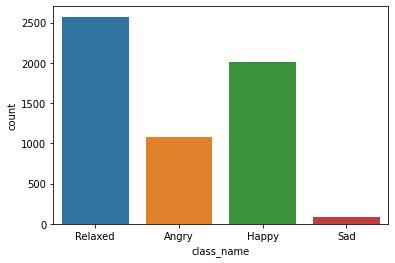

In [45]:
_ = sns.countplot(x="class_name", data=raw_annotated)

# 5) How are the features distributed? Are there any pairs or subsets of features that seem highly correlated or redundant?

# 6) Which features seem useful for classification? Which ones are correlated with the labels?

# 7) Any interesting conclusions you can draw from this for the next project phase?